In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, AveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Nadam 
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [ ]:
# Load Data 
from google.colab import files
uploaded = files.upload()

Saving USD_JPY Historical Data.csv to USD_JPY Historical Data.csv
Saving USD_JPY Test.csv to USD_JPY Test.csv


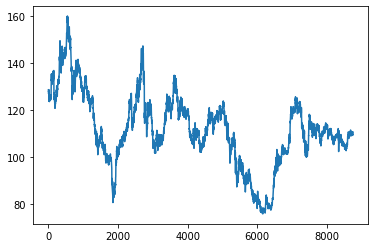

In [ ]:
dataframe = pd.read_csv('USD_JPY Historical Data.csv', usecols=[1])
plt.plot(dataframe)

In [ ]:
dataframe.head()
dataframe.shape

(8749, 1)

In [ ]:
# convert pandas dataframe to numpy array (when dealing with NN, have to convert to np array)
dataset = dataframe.values
dataset = dataset.astype('float64') #convert values to float instead of integer 
dataset.dtype
dataset

array([[128.58],
       [127.76],
       [127.8 ],
       ...,
       [110.72],
       [110.78],
       [110.68]])

In [ ]:
#Normalization is optional but recommended for neural network as certain 
#activation functions are sensitive to magnitude of numbers. 
#normalization of the dataset 
scaler = MinMaxScaler(feature_range=(0,1)) 
#scale the value of dataset to be scalled to value between 0-1 instead because activation function in NN prefer value 0-1
dataset = scaler.fit_transform(dataset)
dataset[:5]

array([[0.62764692],
       [0.61789198],
       [0.61836783],
       [0.62217464],
       [0.61931953]])

In [ ]:
prediction_days = 5

x_train = []
y_train = []

for x in range(prediction_days, len(dataset)): 
  x_train.append(dataset[x-prediction_days:x, 0])
  y_train.append(dataset[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],))
print(x_train[1], y_train[1])
x_train.shape

[0.61789198 0.61836783 0.62217464 0.61931953 0.61182489] 0.6071853438020461


(8744, 5)

In [ ]:
epochs = 100 #number of times the feed forward mechanism and back propagation are repeated 

bs = 32 #batch size for SGD :show what happens when batch size very small
lr =0.001 #learning rate: the degree to which the weights are updated by each batch of SGD

sgd = SGD(lr=lr) #type of optimizer - Alternative: ADAM, NADAM

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#building our NN model using sequential method in keras
#input dimension are ...(N x seq_size)

model = Sequential()
model.add(Dense(64, input_dim = prediction_days, activation='relu')) #input dimension = number of columns = 5 because we have 5 columns in trainX
#model.add(Dense(32, activation='relu')) #input Dense layers, if too many dense layer => overfitting 
model.add(Dropout(0.2))
model.add(Dense(1)) #last layer = output, only 1 neuron which is y value (6th value of train for input from 1-5th of train, etc)
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary())
#First layer: 64 dimensions and 384 parameters Second layer: 1 dimension and 65 parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=bs,
          epochs=epochs, 
          #callbacks= [EarlyStop],
          verbose=2, 
          shuffle=False)

Epoch 1/100
274/274 - 1s - loss: 0.0282 - 677ms/epoch - 2ms/step
Epoch 2/100
274/274 - 0s - loss: 0.0068 - 295ms/epoch - 1ms/step
Epoch 3/100
274/274 - 0s - loss: 0.0052 - 289ms/epoch - 1ms/step
Epoch 4/100
274/274 - 0s - loss: 0.0042 - 286ms/epoch - 1ms/step
Epoch 5/100
274/274 - 0s - loss: 0.0036 - 271ms/epoch - 991us/step
Epoch 6/100
274/274 - 0s - loss: 0.0033 - 278ms/epoch - 1ms/step
Epoch 7/100
274/274 - 0s - loss: 0.0030 - 273ms/epoch - 995us/step
Epoch 8/100
274/274 - 0s - loss: 0.0027 - 276ms/epoch - 1ms/step
Epoch 9/100
274/274 - 0s - loss: 0.0026 - 276ms/epoch - 1ms/step
Epoch 10/100
274/274 - 0s - loss: 0.0024 - 277ms/epoch - 1ms/step
Epoch 11/100
274/274 - 0s - loss: 0.0024 - 263ms/epoch - 961us/step
Epoch 12/100
274/274 - 0s - loss: 0.0023 - 307ms/epoch - 1ms/step
Epoch 13/100
274/274 - 0s - loss: 0.0022 - 271ms/epoch - 989us/step
Epoch 14/100
274/274 - 0s - loss: 0.0021 - 281ms/epoch - 1ms/step
Epoch 15/100
274/274 - 0s - loss: 0.0021 - 283ms/epoch - 1ms/step
Epoch 16/10

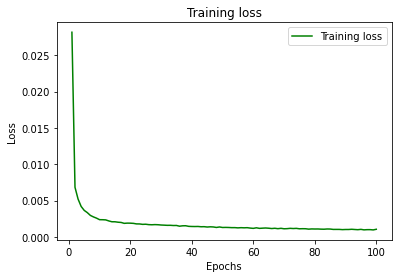

In [ ]:
loss_train = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Load the Test Data
dataframe2 = pd.read_csv('USD_JPY Test.csv', usecols=[4])
dataframe2.head()
len(dataframe2)

78

In [ ]:
actual_prices = dataframe2.values
total_dataset = pd.concat((dataframe['Price'], dataframe2['Close']), axis=0)
total_dataset

0     128.580
1     127.760
2     127.800
3     128.120
4     127.880
       ...   
73    115.618
74    115.278
75    115.331
76    114.675
77    114.118
Length: 8827, dtype: float64

In [ ]:
model_inputs = total_dataset[len(total_dataset)-len(dataframe2) - prediction_days:].values
model_inputs= model_inputs.reshape (-1,1)
model_inputs = scaler.transform(model_inputs)
print(model_inputs[0:5])

[[0.40399714]
 [0.4101832 ]
 [0.41517963]
 [0.41589341]
 [0.41470378]]


In [ ]:
# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

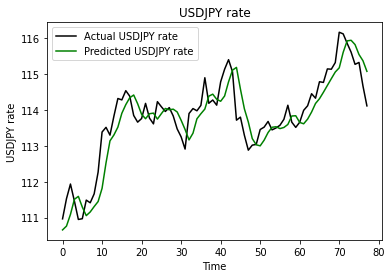

In [ ]:
# Plot the test prediction 

plt.plot(actual_prices, color='black', label =f'Actual USDJPY rate')
plt.plot(predicted_prices, color='green', label=f"Predicted USDJPY rate")
plt.title(f"USDJPY rate")
plt.xlabel('Time')
plt.ylabel(f'USDJPY rate')
plt.legend()
plt.show()

In [ ]:
predicted_prices [65:]

array([[114.317986],
       [114.49821 ],
       [114.68911 ],
       [114.87806 ],
       [115.06434 ],
       [115.180244],
       [115.613976],
       [115.93305 ],
       [115.95001 ],
       [115.82912 ],
       [115.55199 ],
       [115.37876 ],
       [115.08222 ]], dtype=float32)

In [ ]:
#Predict Next Day 

real_data = [model_inputs[len(model_inputs+1) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1]))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')

Prediction: [[114.5769]]
